# Partitioning your Text

## Dividing your text in different ways

When working with an unstructured text, we might want to divide into different units to support our analysis. We got into this a little bit in the section on [plain_text.ipynb](working with plain text), when we discussed how we might break a text apart into structural components that may or not be repersented in the text itself in easy to grab ways. We discussed:

* breaking the text into lines
* breaking the text into chapters
* breaking a poem into stanzas

Those structural units come from the text in some way, but there are others way to divide up texts that might be helpful for certain types of text analysis. 

## Dividing a Text into Units

It often makes sense to partition your text up for more legible analysis. After all, we frequently want to get a more nuanced sense of how particular modes of analysis might change over the course of a text. To do that, the first necessary action is to divide the text into smaller portions that can be individually analyzed. One common ways of doing this is to partition the text into even units. Below we divide the text of Jacob's Room into 100 even pieces.

In [4]:
import math
filename = 'corpus/1922_jacobs_room.txt'
with open(filename, 'r') as fin:
    text = fin.read()

text_length = len(text)
text_chunks = []
number_of_chunks = 100
for i in range(number_of_chunks):
    chunk_size = text_length/number_of_chunks
    chunk_start = math.floor(chunk_size * i)
    chunk_end = math.floor(chunk_size * (i +1))
    text_chunks.append(text[chunk_start:chunk_end])


print('number of chunks in this text: ' + str(len(text_chunks)))
print('length of chunk 1: ' + str(len(text_chunks[0])))
print('length of chunk 2: ' + str(len(text_chunks[1])))
print('length of chunk 3: ' + str(len(text_chunks[2])))

number of chunks in this text: 100
length of chunk 1: 3138
length of chunk 2: 3138
length of chunk 3: 3139


Dividing up the text in this way provides us with a series of small texts, each of which can be subjected to analysis. We can then string the analysis of these smaller pieces to make arguments about trends in the overal piece. Below we take the same bit of code, wrap it into a function, and then use it to track changes in the use of the word Jacob over the course of the novel.

In [2]:
import math
import nltk
import matplotlib.pyplot as plt

def get_chunks(text, num_chunks):
    text_length = len(text)
    text_chunks = []
    number_of_chunks = num_chunks
    for i in range(number_of_chunks):
        chunk_size = text_length/number_of_chunks
        chunk_start = math.floor(chunk_size * i)
        chunk_end = math.floor(chunk_size * (i +1))
        text_chunks.append(text[chunk_start:chunk_end])
    return text_chunks

filename = 'corpus/1922_jacobs_room.txt'
with open(filename, 'r') as fin:
    raw_text = fin.read()

chunked_text = get_chunks(raw_text, 100)
tokenized_text = [nltk.word_tokenize(chunk) for chunk in chunked_text]
jacob_counts = [nltk.FreqDist(tokenized_chunk)['Jacob'] for tokenized_chunk in tokenized_text]
print(jacob_counts)

[2, 6, 4, 0, 1, 1, 0, 3, 3, 7, 2, 0, 0, 4, 2, 2, 1, 2, 8, 2, 0, 1, 4, 5, 6, 3, 12, 2, 0, 0, 4, 1, 3, 13, 1, 1, 1, 6, 4, 4, 4, 7, 6, 6, 5, 0, 1, 2, 7, 6, 2, 3, 0, 3, 6, 5, 6, 6, 4, 6, 4, 5, 2, 2, 2, 8, 0, 3, 10, 3, 7, 9, 9, 5, 1, 2, 5, 6, 7, 0, 4, 9, 3, 1, 6, 6, 3, 3, 8, 7, 4, 1, 4, 6, 7, 6, 4, 0, 7, 4]


Remember - we have divided the text up into 100 (roughly) equal units. Using the FreqDist() module in the NLTK package we get a quick count of the word 'Jacob' in the text. We can then take that information and plot it to get a sense of the change overr the course of the novel.

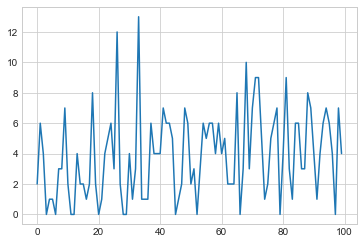

In [3]:
plt.style.use('seaborn-whitegrid')
plt.plot(jacob_counts)
plt.show()

This might be a little difficult to read. Fortunately we already have code that can help us parse things a little differently. Rather than slotting things into 100 equal parts, we can use the same function to shift to ten equal chunks for the whole novel.

[27, 23, 33, 38, 44, 41, 39, 52, 50, 43]


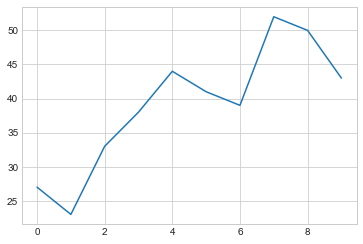

In [4]:
import math
import nltk
import matplotlib.pyplot as plt

def get_chunks(text, num_chunks):
    text_length = len(text)
    text_chunks = []
    number_of_chunks = num_chunks
    for i in range(number_of_chunks):
        chunk_size = text_length/number_of_chunks
        chunk_start = math.floor(chunk_size * i)
        chunk_end = math.floor(chunk_size * (i +1))
        text_chunks.append(text[chunk_start:chunk_end])
    return text_chunks

filename = 'corpus/1922_jacobs_room.txt'
with open(filename, 'r') as fin:
    raw_text = fin.read()

chunked_text = get_chunks(raw_text, 10)
tokenized_text = [nltk.word_tokenize(chunk) for chunk in chunked_text]
jacob_counts = [nltk.FreqDist(tokenized_chunk)['Jacob'] for tokenized_chunk in tokenized_text]
print(jacob_counts)
plt.style.use('seaborn-whitegrid')
plt.plot(jacob_counts)
plt.show()

The lesson here is that visualizations are constructed and subject to interpretation. The first graph using 100 chunks showed a text with a noisy distribution of results and no clear meaning. The second graph accounted for some of this noise by using a smaller number of chunks, the result being that we can clearly see an increase in the use of Jacob's name over the course of the novel. But, at the same time, using ten equal units instead of 100 gives us a far less granular view of the usage over time. It might give the impression, for example, that the word "Jacob" occurs constantly. This is nonsense, of course - no word in a novel occurs continuously, and we need only look at the previous graph to see portions of the text where the name doesn't occur at all. 